# Predicting Whether tommorow will rain or not

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("E:\\Data Files\\WeatherAUS.csv",encoding='latin-1')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [4]:
import numpy as np

# Average Rainfall At Cairns

In [5]:
n1 = df[(df["Location"]=="Cairns")]
print("Average rainfall in Cairns: {:.2f}".format(np.mean(n1["Rainfall"])))

Average rainfall in Cairns: 5.77


# Locations which have Rainfall greater than 200

In [6]:
n2 = df.sort_values("Rainfall")
n3 = n2[n2["Rainfall"]>200]
print(n3[["Location","Rainfall"]].to_string(index=False))

    Location  Rainfall
      Cairns     206.2
  Townsville     206.8
CoffsHarbour     208.5
      Darwin     210.6
   Newcastle     216.3
CoffsHarbour     219.6
 Williamtown     225.0
  Townsville     236.8
   Newcastle     240.0
      Cairns     247.2
      Cairns     268.6
      Cairns     278.4
      Darwin     367.6
CoffsHarbour     371.0


In [7]:
df.shape

(142193, 24)

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

# Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
df["Location"] = le.fit_transform(df["Location"].astype(str))
df["WindGustDir"] = le.fit_transform(df["WindGustDir"].astype(str))
df["WindDir9am"] = le.fit_transform(df["WindDir9am"].astype(str))
df["WindDir3pm"] = le.fit_transform(df["WindDir3pm"].astype(str))
df["RainToday"] = le.fit_transform(df["RainToday"].astype(str))
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"].astype(str))

# Feature Selection

In [12]:
df=df[[ 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]    #risk_mm is not selected as it will not affect rain 

# EDA

Cleaning Data 


In [13]:
df=df.dropna()

In [14]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
df.shape

(58090, 22)

Removing Outliers

In [16]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,...,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000,58090.000000
mean,25.457979,13.338375,24.131131,2.117345,5.445135,7.698850,7.484954,40.558513,7.349544,7.603409,...,66.219298,49.699501,1017.334378,1014.881647,4.247203,4.327733,18.086406,22.631038,0.219780,0.219125
std,12.811458,6.468647,6.973671,6.991141,3.691376,3.765291,4.794127,13.384461,4.811973,4.728081,...,18.628851,20.220514,6.938807,6.899850,2.803154,2.650418,6.604757,6.835156,0.414101,0.413657
min,3.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.900000,3.700000,0.000000,0.000000
25%,15.000000,8.400000,18.600000,0.000000,2.800000,5.000000,3.000000,31.000000,3.000000,3.000000,...,55.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,12.900000,17.300000,0.000000,0.000000
50%,27.000000,13.100000,23.800000,0.000000,4.800000,8.600000,8.000000,39.000000,7.000000,8.000000,...,67.000000,51.000000,1017.300000,1014.800000,5.000000,5.000000,17.700000,22.300000,0.000000,0.000000
75%,37.000000,18.300000,29.600000,0.600000,7.400000,10.700000,12.000000,48.000000,12.000000,12.000000,...,80.000000,63.000000,1022.000000,1019.500000,7.000000,7.000000,23.200000,27.800000,0.000000,0.000000
max,48.000000,31.400000,48.100000,206.200000,81.200000,14.500000,16.000000,124.000000,16.000000,16.000000,...,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


<AxesSubplot:>

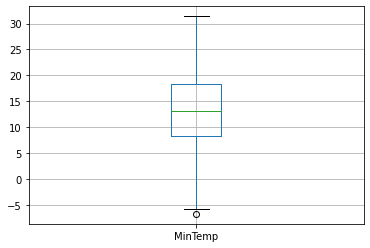

In [17]:
df.boxplot(column=['MinTemp'])

<AxesSubplot:>

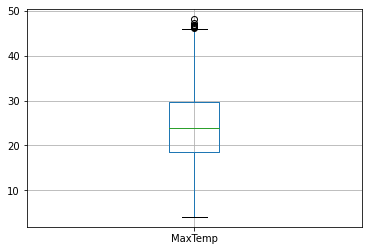

In [18]:
df.boxplot(column=['MaxTemp'])

<AxesSubplot:>

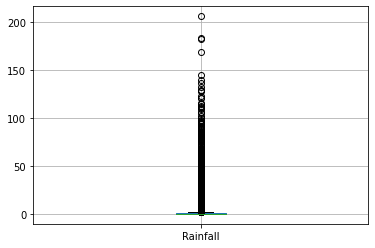

In [19]:
df.boxplot(column=['Rainfall'])

In [20]:
df['Rainfall'].value_counts()

0.0      37801
0.2       3141
0.4       1651
0.6       1117
0.8        864
         ...  
182.6        1
81.8         1
68.0         1
89.2         1
70.8         1
Name: Rainfall, Length: 414, dtype: int64

In [21]:
df=df[df['Rainfall']!=0]     #removing rows with rainfall equal to zero save model from getting biased towards one dataset

In [22]:
df.shape

(20289, 22)

<AxesSubplot:>

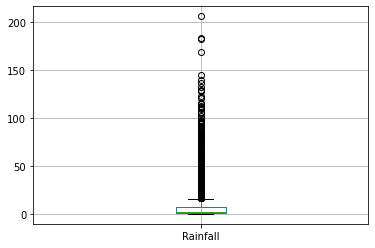

In [23]:
df.boxplot(column=['Rainfall'])

<AxesSubplot:>

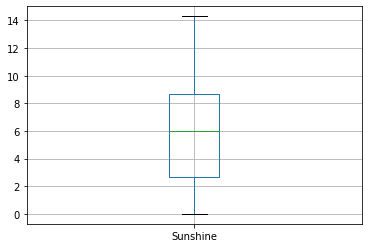

In [24]:
df.boxplot(column=['Sunshine'])


<AxesSubplot:>

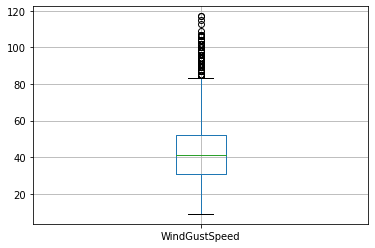

In [25]:
df.boxplot(column=['WindGustSpeed'])

<AxesSubplot:>

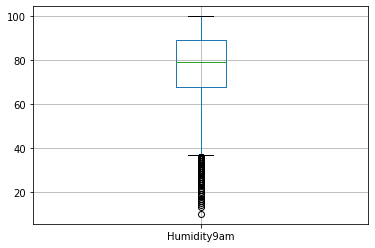

In [26]:
df.boxplot(column=['Humidity9am'])

<AxesSubplot:>

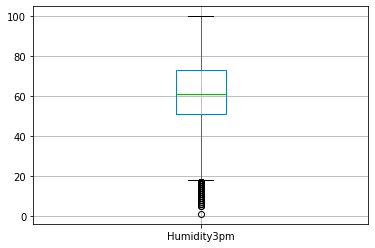

In [27]:
df.boxplot(column=['Humidity3pm'])

<AxesSubplot:>

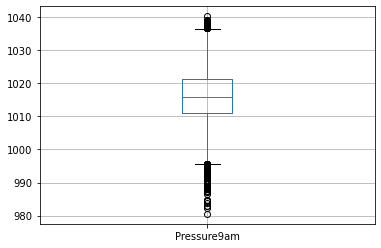

In [28]:
df.boxplot(column=['Pressure9am'])

<AxesSubplot:>

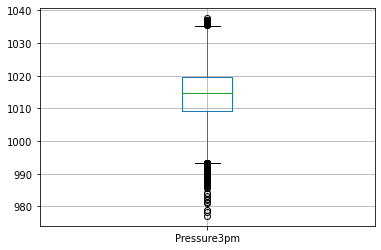

In [29]:
df.boxplot(column=['Pressure3pm'])

<AxesSubplot:>

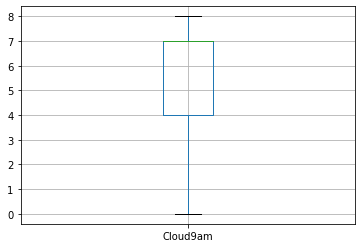

In [30]:
df.boxplot(column=['Cloud9am'])

<AxesSubplot:>

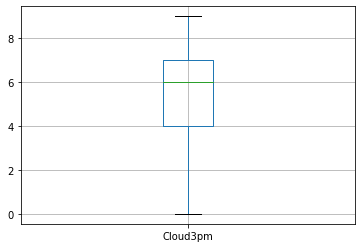

In [31]:
df.boxplot(column=['Cloud3pm'])

<AxesSubplot:>

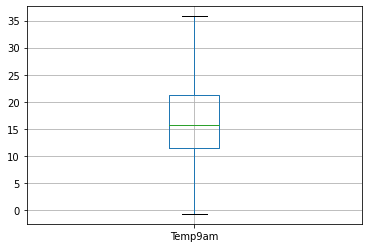

In [32]:
df.boxplot(column=['Temp9am'])

<AxesSubplot:>

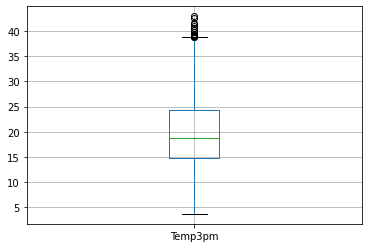

In [33]:
df.boxplot(column=['Temp3pm'])

<AxesSubplot:>

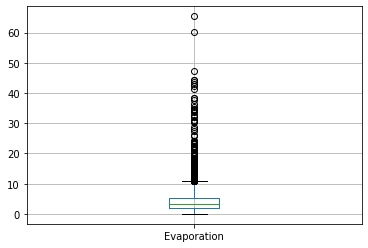

In [34]:
df.boxplot(column=['Evaporation'])

Removing Outliers

In [35]:
df=df[(df['Temp3pm']<30)&(df['Pressure3pm']>1000)&(df['Pressure3pm']<1030)&(df['Pressure3pm']>1000)&(df['Pressure9am']>1000)&(df['Pressure9am']<1030)&(df['Humidity3pm']>20)&(df['Humidity9am']>40)&(df['WindGustSpeed']<80)&(df['Evaporation']<9)]

In [36]:
df.shape

(16319, 22)

In [37]:
df=df[df['Rainfall']<10]

In [38]:
df.shape

(13615, 22)

# Data Visualiazation

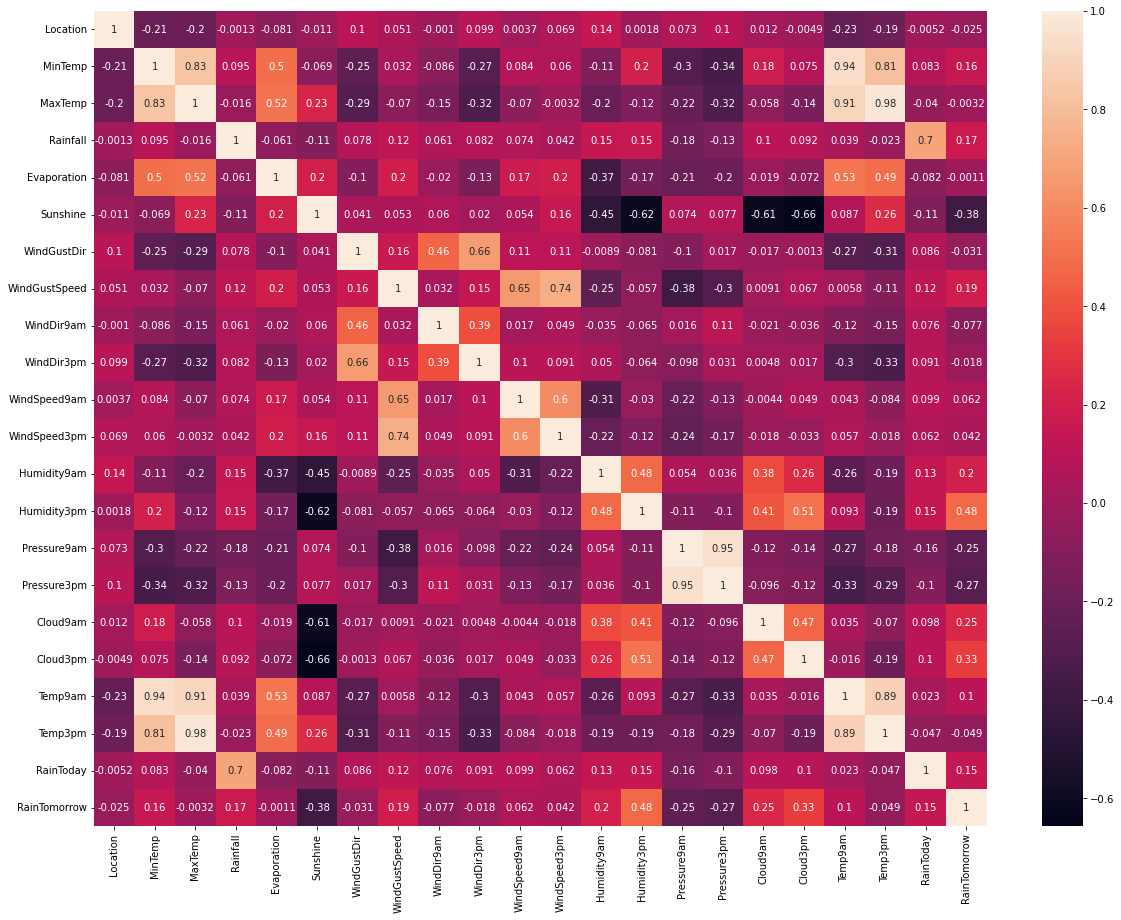

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
corelation = df.corr()
plt.subplots(figsize=(20,15))
_ = sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

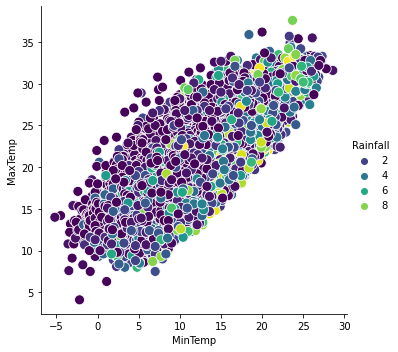

In [40]:
_ = sns.relplot(x="MinTemp",y="MaxTemp",hue="Rainfall",palette="viridis",data=df,s=100)

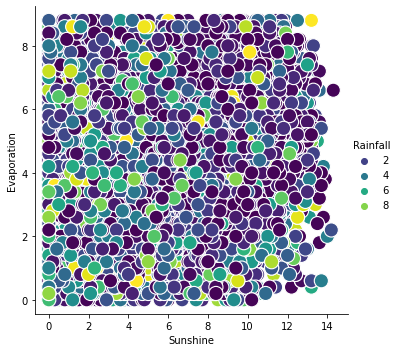

In [41]:
_ = sns.relplot(x="Sunshine",y="Evaporation",hue="Rainfall",palette="viridis",data=df,s=200)

In [42]:
X=df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']].values
Y=df[['RainTomorrow']].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)   #training of model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
df.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5982,10,16.8,23.3,0.6,8.0,2.3,0,63.0,0,0,...,66.0,53.0,1013.8,1012.2,7.0,7.0,18.5,22.4,0,1


In [49]:
lr.predict([[12,14,25,1.5, 9.0, 2.5,0,69,0,1,
       64, 64, 66, 66,1000, 1034, 6, 7, 25,
       22, 1]])

array([0])

In [50]:
Y_pred1=lr.predict(X_test)
accuracy_score(Y_test,Y_pred1)

0.777027027027027

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,Y_train)
Y_pred2=knn.predict(X_test)
accuracy_score(Y_test,Y_pred2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7799647473560517

# SVM

In [80]:
from sklearn.svm import SVC
svc=SVC(probability = True)
svc.fit(X_train,Y_train)
Y_pred3=knn.predict(X_test)
accuracy_score(Y_test,Y_pred3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7799647473560517

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred4=knn.predict(X_test)
accuracy_score(Y_test,Y_pred4)

C:\Users\SHUBHAM GARGE\AppData\Local\Temp\ipykernel_5724\3672722416.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,Y_train)


0.7799647473560517

## Multiple Model Ensemble Voting Classifier

In [83]:
from sklearn.ensemble import VotingClassifier  #soft voting (average)
vc = VotingClassifier( [('clf1',lr) , ('clf2',knn) , ('clf4',rfc)] , voting = 'soft')
vc.fit(X_train,Y_train)
Y_pred5=vc.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [84]:
accuracy_score(Y_test,Y_pred5)

0.7914218566392479

In [78]:
vc2 = VotingClassifier( [('clf1',lr) , ('clf2',knn) , ('clf4',rfc)] , voting = 'hard')  #hard voting (maximum vote)
vc2.fit(X_train,Y_train)
Y_pred6=vc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [79]:
accuracy_score(Y_test,Y_pred6)

0.7923031727379554